In [1]:
#  Import libraries
import pandas as pd
import numpy as np

# Load the dataset
netflix_data = pd.read_csv('netflix_titles.csv')

#  Inspect the data
print("Dataset Overview:")
print(netflix_data.head())
print("\nSummary:")
print(netflix_data.info())

#  Check for missing values
print("\nMissing Values:")
print(netflix_data.isnull().sum())

#  Handle missing values
netflix_data['rating'].fillna('Unknown', inplace=True)
netflix_data.dropna(subset=['title', 'type'], inplace=True)

# Clean Duration Column
netflix_data['duration'] = netflix_data['duration'].str.extract('(\d+)')
netflix_data['duration'].fillna(0, inplace=True)
netflix_data['duration'] = netflix_data['duration'].astype(int)

#  Save cleaned data
netflix_data.to_csv('Cleaned_Netflix_Data.csv', index=False)
print("Cleaned data saved as 'Cleaned_Netflix_Data.csv'")


<>:26: SyntaxWarning: invalid escape sequence '\d'
<>:26: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Sudharsana\AppData\Local\Temp\ipykernel_10324\532621925.py:26: SyntaxWarning: invalid escape sequence '\d'
  netflix_data['duration'] = netflix_data['duration'].str.extract('(\d+)')


Dataset Overview:
  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  Septembe

C:\Users\Sudharsana\AppData\Local\Temp\ipykernel_10324\532621925.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  netflix_data['rating'].fillna('Unknown', inplace=True)
C:\Users\Sudharsana\AppData\Local\Temp\ipykernel_10324\532621925.py:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

C:\Users\Sudharsana\AppData\Local\Temp\ipykernel_10324\2650499474.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=netflix_data, palette='coolwarm')


<Figure size 800x600 with 0 Axes>

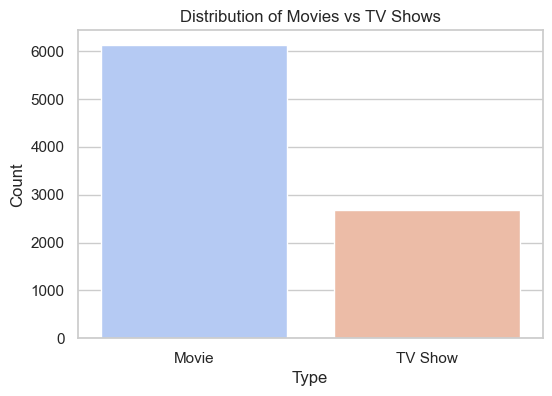

C:\Users\Sudharsana\AppData\Local\Temp\ipykernel_10324\2650499474.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Genre', data=top_genres, palette='viridis')


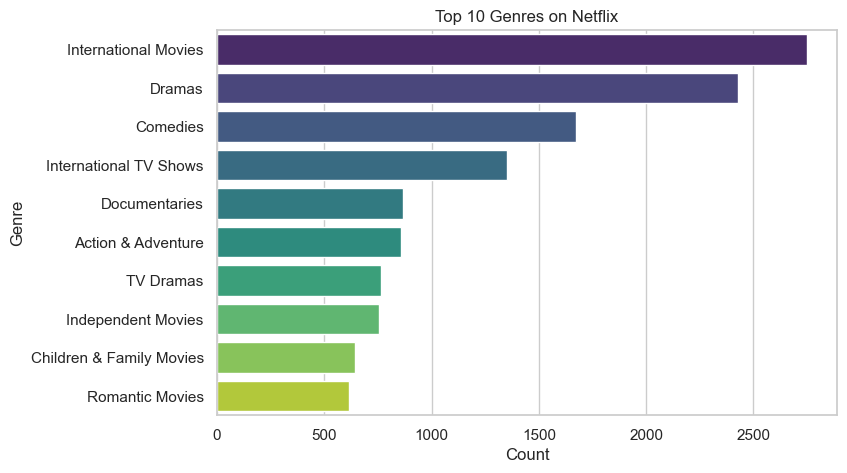

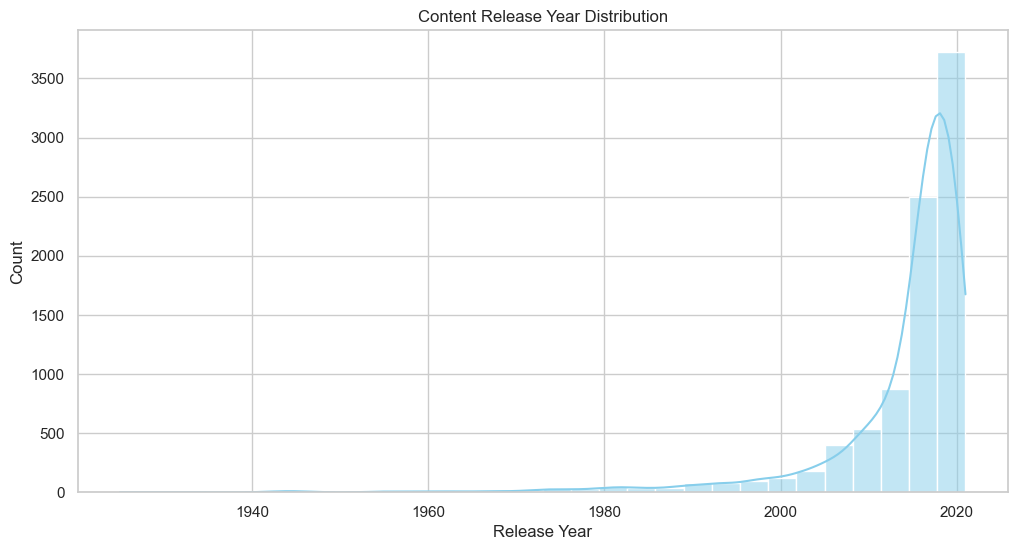

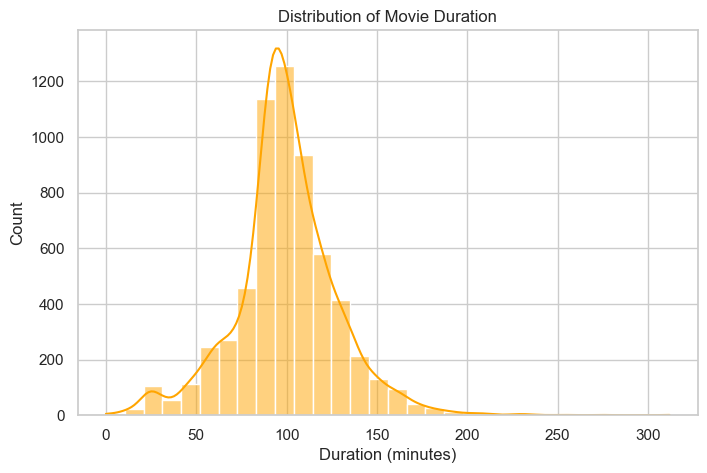

C:\Users\Sudharsana\AppData\Local\Temp\ipykernel_10324\2650499474.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='magma')


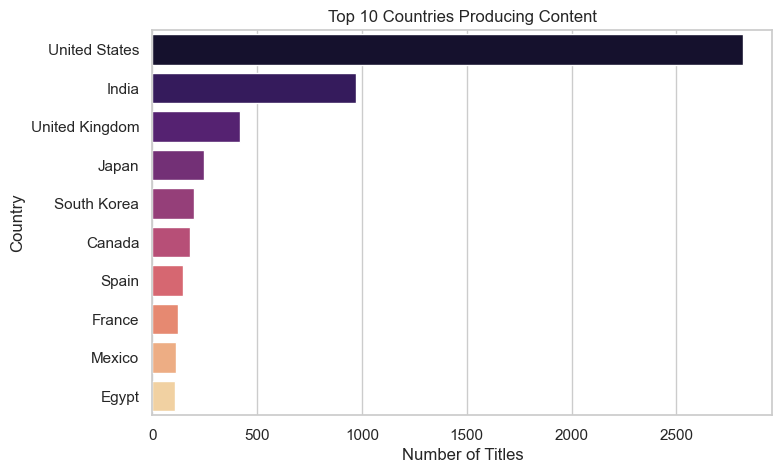

In [5]:
# Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Cleaned Dataset
netflix_data = pd.read_csv('Cleaned_Netflix_Data.csv')

# General Plot Settings
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

# 1. Content Type Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='type', data=netflix_data, palette='coolwarm')
plt.title("Distribution of Movies vs TV Shows")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()

# 2. Top 10 Genres (from 'listed_in')
from collections import Counter
genres = ','.join(netflix_data['listed_in'].dropna()).split(',')
genre_count = Counter([genre.strip() for genre in genres])

top_genres = pd.DataFrame(genre_count.most_common(10), columns=['Genre', 'Count'])
plt.figure(figsize=(8, 5))
sns.barplot(x='Count', y='Genre', data=top_genres, palette='viridis')
plt.title("Top 10 Genres on Netflix")
plt.show()

# 3. Release Year Trends
plt.figure(figsize=(12, 6))
sns.histplot(netflix_data['release_year'], bins=30, kde=True, color="skyblue")
plt.title("Content Release Year Distribution")
plt.xlabel("Release Year")
plt.ylabel("Count")
plt.show()

# 4. Duration Analysis for Movies
movie_duration = netflix_data[netflix_data['type'] == 'Movie']
plt.figure(figsize=(8, 5))
sns.histplot(movie_duration['duration'], bins=30, kde=True, color='orange')
plt.title("Distribution of Movie Duration")
plt.xlabel("Duration (minutes)")
plt.show()

# 5. Top 10 Countries Producing Content
top_countries = netflix_data['country'].dropna().value_counts().head(10)
plt.figure(figsize=(8, 5))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='magma')
plt.title("Top 10 Countries Producing Content")
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.show()


In [7]:
# Import Libraries
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Load the Cleaned Netflix Data
netflix_data = pd.read_csv('Cleaned_Netflix_Data.csv')

# Step 1: Combine Relevant Columns into a Single Text Column
netflix_data['combined_features'] = netflix_data['title'].fillna('') + ' ' + \
                                    netflix_data['listed_in'].fillna('') + ' ' + \
                                    netflix_data['description'].fillna('')

# Step 2: Text Vectorization using TF-IDF
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(netflix_data['combined_features'])

# Step 3: Compute Cosine Similarity
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Step 4: Build a Function for Recommendations
def recommend_movies(title, cosine_sim=cosine_sim):
    idx = netflix_data[netflix_data['title'] == title].index[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:11]  # Top 10 recommendations
    movie_indices = [i[0] for i in sim_scores]
    return netflix_data['title'].iloc[movie_indices]

# Example Usage: Get Recommendations for a Movie
movie_title = "Breaking Bad"  
print(f"Recommendations for '{movie_title}':")
print(recommend_movies(movie_title))


Recommendations for 'Breaking Bad':
2606                              Extracurricular
4118                                  Iron Ladies
4143                                       Sparta
3855                                   The Writer
1559                    The Mess You Leave Behind
5352    Have You Ever Fallen in Love, Miss Jiang?
2643                                     Love 101
1067                               The Underclass
517                             Good Morning Call
4664                             Age of Rebellion
Name: title, dtype: object
